In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from dask.order import order
from isort.profiles import black

# Data Import

In [2]:
vendors = pd.read_csv('data/vendors.csv', sep = ',',low_memory=False)
vendors

,id,authentication_id,latitude,longitude,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,...,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at,updated_at,device_type,display_orders
0,4,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,...,1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1
1,13,118608.0,-0.471654,0.744470,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,...,1.0,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1
2,20,118616.0,-0.407527,0.643681,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,...,1.0,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1
3,23,118619.0,-0.585385,0.753811,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,...,1.0,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1
4,28,118624.0,0.480602,0.552850,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,...,1.0,5,Burgers,Y,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,849,130455.0,-1.588060,-0.066441,Restaurants,2.0,0.0,10.0,1.0,NaN,...,1.0,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",Y,1.0,1.0,2019-12-21 12:47:39,2020-04-07 20:01:33,3,1
96,855,130463.0,2.145206,0.745025,Restaurants,2.0,0.0,8.0,1.0,NaN,...,1.0,"1,5,8,91,30,48,24","American,Burgers,Desserts,Free Delivery,Fries,...",Y,1.0,1.0,2019-12-21 13:02:32,2020-04-07 01:50:41,3,1
97,856,130464.0,0.251469,0.483632,Restaurants,2.0,0.0,7.0,1.0,NaN,...,1.0,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",Y,1.0,1.0,2019-12-21 13:04:34,2020-04-06 23:53:16,3,1
98,858,130468.0,0.019817,0.587087,Restaurants,2.0,0.0,3.0,1.0,NaN,...,1.0,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",Y,1.0,1.0,2019-12-21 13:12:09,2020-04-07 14:26:08,3,1


In [3]:
orders = pd.read_csv('data/orders.csv', sep = ',',low_memory=False)
orders

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135298,415507.0,L6LFY6H,1.0,13.3,2,NaN,0.0,0.0,No,No,...,2020-02-29 23:59:21,2020-03-01 00:02:10,2020-03-01 00:22:53,2020-03-01 00:29:42,NaN,67,2020-02-29 23:47:59,0,NaN,L6LFY6H X 0 X 67
135299,415508.0,2GMMVGI,3.0,9.5,1,NaN,0.0,0.0,No,Yes,...,2020-03-01 00:19:46,2020-03-01 00:20:05,2020-03-01 00:27:50,2020-03-01 01:03:14,NaN,79,2020-02-29 23:48:37,0,Work,2GMMVGI X 0 X 79
135300,415510.0,LYTAAV0,4.0,18.2,2,NaN,0.0,0.0,No,No,...,2020-03-01 00:04:28,2020-03-01 00:10:34,2020-03-01 00:14:43,2020-03-01 00:36:37,NaN,28,2020-02-29 23:48:43,2,Other,LYTAAV0 X 2 X 28
135301,415512.0,NEV9A5D,3.0,7.7,1,NUE5BZAA7,0.0,0.0,No,No,...,2020-03-01 00:06:14,2020-03-01 00:08:10,2020-03-01 00:22:11,2020-03-01 00:36:52,NaN,841,2020-02-29 23:50:10,0,NaN,NEV9A5D X 0 X 841


In [4]:
train_locations = pd.read_csv('data/train_locations.csv', sep = ',',low_memory=False)
train_locations

,customer_id,location_number,location_type,latitude,longitude
0,02SFNJH,0,NaN,1.682392,-78.789737
1,02SFNJH,1,NaN,1.679137,0.766823
2,02SFNJH,2,NaN,-0.498648,0.661241
3,RU43CXC,0,Home,0.100853,0.438165
4,BDFBPRD,0,NaN,2.523125,0.733464
...,...,...,...,...,...
59498,9PP42SA,2,NaN,-0.788515,-78.497721
59499,9PP42SA,3,Home,-1.445114,0.072558
59500,9PP42SA,4,NaN,-0.001785,0.431695
59501,HWELAU8,0,NaN,-0.066291,-78.583075


In [5]:
train_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59503 entries, 0 to 59502
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      59503 non-null  object 
 1   location_number  59503 non-null  int64  
 2   location_type    32294 non-null  object 
 3   latitude         59497 non-null  float64
 4   longitude        59497 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.3+ MB


In [6]:
train_locations = train_locations[(train_locations['latitude'] >= -90) & (train_locations['latitude'] <= 90)]
train_locations = train_locations[(train_locations['longitude'] >= -180) & (train_locations['longitude'] <= 180)]
train_locations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58169 entries, 0 to 59502
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      58169 non-null  object 
 1   location_number  58169 non-null  int64  
 2   location_type    31672 non-null  object 
 3   latitude         58169 non-null  float64
 4   longitude        58169 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.7+ MB


In [7]:
train_customers = pd.read_csv('data/train_customers.csv', sep = ',',low_memory=False)
train_customers

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23
1,ZGFSYCZ,Male,NaN,1,1,EN,2018-02-09 12:04:42,2018-02-09 12:04:41
2,S2ALZFL,Male,NaN,0,1,EN,2018-03-14 18:31:43,2018-03-14 18:31:42
3,952DBJQ,Male,NaN,1,1,EN,2018-03-15 19:47:07,2018-03-15 19:47:07
4,1IX6FXS,Male,NaN,1,1,EN,2018-03-15 19:57:01,2018-03-15 19:57:01
...,...,...,...,...,...,...,...,...
34669,JAI79PE,NaN,NaN,1,1,NaN,2020-03-03 13:01:13,2020-03-03 13:02:21
34670,TR75VFL,NaN,NaN,1,1,NaN,2020-03-03 13:22:35,2020-03-03 13:22:41
34671,SQMJ08H,NaN,NaN,1,1,NaN,2020-03-03 13:24:27,2020-03-03 13:24:44
34672,9LW9CHN,NaN,NaN,1,1,NaN,2020-03-03 13:24:28,2020-03-03 13:28:00


# Data Exploration

In [8]:
vendors.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   authentication_id     100 non-null    float64
 2   latitude              100 non-null    float64
 3   longitude             100 non-null    float64
 4   vendor_category_en    100 non-null    object 
 5   vendor_category_id    100 non-null    float64
 6   delivery_charge       100 non-null    float64
 7   serving_distance      100 non-null    float64
 8   is_open               100 non-null    float64
 9   OpeningTime           91 non-null     object 
 10  OpeningTime2          91 non-null     object 
 11  prepration_time       100 non-null    int64  
 12  commission            85 non-null     float64
 13  is_akeed_delivering   100 non-null    object 
 14  discount_percentage   100 non-null    float64
 15  status                10

In [9]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135303 entries, 0 to 135302
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   akeed_order_id                  135233 non-null  float64
 1   customer_id                     135303 non-null  object 
 2   item_count                      128378 non-null  float64
 3   grand_total                     135303 non-null  float64
 4   payment_mode                    135303 non-null  int64  
 5   promo_code                      4305 non-null    object 
 6   vendor_discount_amount          135303 non-null  float64
 7   promo_code_discount_percentage  65880 non-null   float64
 8   is_favorite                     100108 non-null  object 
 9   is_rated                        135303 non-null  object 
 10  vendor_rating                   45220 non-null   float64
 11  driver_rating                   135303 non-null  float64
 12  deliverydistance

In [10]:
train_locations.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 58169 entries, 0 to 59502
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      58169 non-null  object 
 1   location_number  58169 non-null  int64  
 2   location_type    31672 non-null  object 
 3   latitude         58169 non-null  float64
 4   longitude        58169 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.3 MB


In [11]:
train_customers.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34674 entries, 0 to 34673
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   akeed_customer_id  34674 non-null  object 
 1   gender             22520 non-null  object 
 2   dob                3046 non-null   float64
 3   status             34674 non-null  int64  
 4   verified           34674 non-null  int64  
 5   language           21099 non-null  object 
 6   created_at         34674 non-null  object 
 7   updated_at         34674 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 10.1 MB


In [12]:
train_customers.rename(columns={'akeed_customer_id':'customer_id'}, inplace=True)

train_customers['gender'] = train_customers['gender'].fillna('F')
train_customers['gender'] = train_customers['gender'].replace(to_replace=[r'[?| ].*'], value=['F'], regex=True)
train_customers['gender'] = train_customers['gender'].replace(to_replace=[r'[F|f].*', r'[M|m].*'], value=['F', 'M'], regex=True)

train_customers.drop(columns=['language','status','dob','verified'], axis=1, inplace=True)

#remove the duplicates in the train_customers that have the same customer_id (take the last updated from the column 'updated_at')
train_customers = train_customers.sort_values('updated_at')
train_customers = train_customers.drop_duplicates(subset='customer_id', keep='last')
train_customers.drop(columns=['updated_at','created_at'], axis=1, inplace=True)

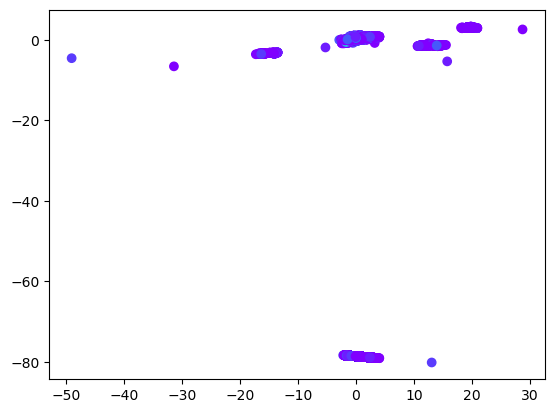

In [13]:
plt.scatter(train_locations['latitude'], train_locations['longitude'], c=train_locations['location_number'], cmap='rainbow')


In [14]:
# apply a clustering algorithm to the locations to group them into regions and reset 'location_number' to be the cluster number
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_locations_scaled = scaler.fit_transform(train_locations[['latitude','longitude']])

In [15]:
train_locations_scaled

array([[ 0.54086879, -1.44100699],
       [ 0.5396806 ,  0.70907972],
       [-0.25528861,  0.70622628],
       ...,
       [-0.07391565,  0.70002257],
       [-0.09746265, -1.43542175],
       [-0.0977373 ,  0.7058744 ]])

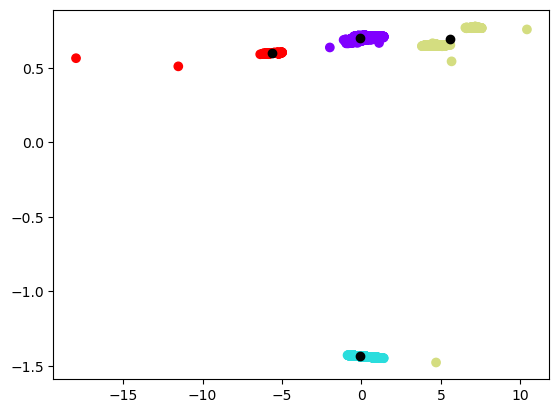

In [16]:

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(train_locations_scaled)
y_kmeans = kmeans.predict(train_locations_scaled)

plt.scatter(train_locations_scaled[:, 0], train_locations_scaled[:, 1], c=y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black')

In [17]:
#check the silhouette score the more it is closer to 1 the better the clustering
from sklearn.metrics import silhouette_score
silhouette_score(train_locations_scaled, y_kmeans)

0.8636848013496325

In [18]:
#affect the cluster number to a new column named location_number_clustered
train_locations['location_clustered_client'] = y_kmeans
train_locations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58169 entries, 0 to 59502
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                58169 non-null  object 
 1   location_number            58169 non-null  int64  
 2   location_type              31672 non-null  object 
 3   latitude                   58169 non-null  float64
 4   longitude                  58169 non-null  float64
 5   location_number_clustered  58169 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 2.9+ MB


In [54]:
train_locations[train_locations['location_number'] != train_locations['location_number_clustered']]

,customer_id,location_number,location_type,latitude,longitude,location_number_clustered
0,02SFNJH,0,NaN,1.682392,-78.789737,1
1,02SFNJH,1,NaN,1.679137,0.766823,0
2,02SFNJH,2,NaN,-0.498648,0.661241,0
5,WMGKW6W,0,NaN,12.663413,-1.429919,2
6,NDYLK9A,0,NaN,-0.203280,-78.566885,1
...,...,...,...,...,...,...
59498,9PP42SA,2,NaN,-0.788515,-78.497721,1
59499,9PP42SA,3,Home,-1.445114,0.072558,0
59500,9PP42SA,4,NaN,-0.001785,0.431695,0
59501,HWELAU8,0,NaN,-0.066291,-78.583075,1


In [65]:
orders = orders[['akeed_order_id','customer_id','vendor_id','CID X LOC_NUM X VENDOR','deliverydistance','delivery_time','is_favorite','is_rated','vendor_rating','driver_rating','delivered_time','created_at']]
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135303 entries, 0 to 135302
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   akeed_order_id          135233 non-null  float64
 1   customer_id             135303 non-null  object 
 2   vendor_id               135303 non-null  int64  
 3   CID X LOC_NUM X VENDOR  135303 non-null  object 
 4   deliverydistance        135303 non-null  float64
 5   delivery_time           5123 non-null    object 
 6   is_favorite             100108 non-null  object 
 7   is_rated                135303 non-null  object 
 8   vendor_rating           45220 non-null   float64
 9   driver_rating           135303 non-null  float64
 10  delivered_time          85741 non-null   object 
 11  created_at              135303 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 53.6 MB


In [67]:
# join the orders with the train_locations and train_customers
train_joined = train_customers.merge(train_locations, on='customer_id', how='inner')
train_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56729 entries, 0 to 56728
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                56729 non-null  object 
 1   gender                     56729 non-null  object 
 2   location_number            56729 non-null  int64  
 3   location_type              30881 non-null  object 
 4   latitude                   56729 non-null  float64
 5   longitude                  56729 non-null  float64
 6   location_number_clustered  56729 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 2.8+ MB


In [29]:
def get_score():
    

SyntaxError: incomplete input (1127356835.py, line 2)